<a href="https://colab.research.google.com/github/A01793509/Equipo38/blob/main/Actividad_Semana_9_Equipo38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Profr: Luis Eduardo Falcón Morales

## **Adtividad de la Semana 9**
###**Taxonomía de Métricas de Clasificación**

**Nombres y matrículas de los integrantes del equipo:**

*   Alberto Jose Garcia Porras (A01793509)
*   Carlos Julio León Caicedo (A01793947)
*   Luis Fernando Ríos Piedra (A00453954)
*   Marco Antonio Vázquez Morales (A01793704)


---

# 1. Resumen del artículo

---

Garantizar una correcta evaluación del modelo de aprendizaje es clave para asegurar un adecuado reconocimiento de patrones, en ese sentido, existen dos aspectos primordiales a tener en cuenta para la evaluación, el primero basado en los datos estadísticos e intervalos de confianza del modelo, y el otro basado en la métrica utilizada para evaluarlo. Teniendo en cuenta que existen diferentes métricas de clasificación enfocadas en diversos tópicos del aprendizaje, es importante identificar la métrica adecuada para el modelo que estemos desarrollando.  Asimismo, dadas las características de las métricas existe una clasificación que las agrupa por familia, generando básicamente las siguientes categorías:

*   Métricas basadas en un umbral y una comprensión cualitativa del error (**Threshold**).
*   Métricas basadas en una comprensión probabilística del error (**Probabilistic**).
*   Métricas basadas en que tan bien se clasifica un modelo (**Rank**).

Lo anterior nos lleva a otro interrogante, ¿Puedo seleccionar cualquier métrica para evaluar mi modelo?, precisamente esta es la respuesta que se plantea con el estudio, ya que no necesariamente se podrán extrapolar los resultados obtenidos a partir de una métrica aplicada a un modelo utilizando otras métricas de la misma familia, sobretodo cuando estamos lidiando con problemas multi-clase, clases desbalanceadas o conjuntos de datos pequeños. De igual forma, existen características presentes en algunas métricas que pueden generar sensibilidad al compararlas con la obtención de los resultados en otras métricas que carecen de dichas características. Por lo anterior, es importante identificar la correlación existente entre las métricas que decidamos utilizar en nuestro modelo.
Por otra parte, un aspecto a considerar es la relación que pueda existir entre los métodos de clasificación y las estimaciones correctas, o en otras palabras la calibración de nuestro modelo, que podemos interpretar como el grado de aproximación de las probabilidades predichas versus las probabilidades reales, lo que se traduce como la confiabilidad en las predicciones del modelo. Cabe anotar que una adecuada calibración implica dividir el conjunto de datos en segmentos o contenedores, por lo cual en el estudio se experimentó superponiéndolos. 

Dentro de las métricas identificadas en el estudio como relevantes para evaluar la clasificación de un modelo tenemos la **precisión** (grado de predicciones correctas), **Área Bajo la Curva (AUC)** (probabilidad de que un clasificador clasifique de manera positiva una instancia en vez de una negativa tomadas al azar), **Error Absoluto Medio (MAE)** (desviaciones de las predicciones de la probabilidad real) y **Error Cuadrático Medio (MSE)** (variante de MAE que penaliza fuertemente las desviaciones de la probabilidad real), entre otras.

Para finalizar, las conclusiones relevantes del estudio fueron:

*   No existen métricas que combinen umbrales y estimaciones probabilísticas.
*   La precisión y las métricas cualitativas son la mejor opción cuando el ruido está presente en el conjunto de datos, pero si el algoritmo del modelo presenta fallas o si el conjunto de datos es muy pequeño no es recomendable hacer uso de este tipo de métrica.
*   Las métricas **AUC** son las recomendables cuando se presenta distorsión en los datos o durante el proceso de entrenamiento del modelo.
*   Las métricas cualitativas mantienen una correlación alta cuando el conjunto de datos se encuentra balanceado.
*   Para las métricas probabilísticas y de calibración se presentan correlaciones bajas, por el contrario, para la familia de las métricas AUC de clasificación se presenta una correlación fuerte.

Como aprendizaje final del estudio, no podemos establecer puntos de comparación entre las familias de métricas o incluso entre las métricas de una misma familia, ya que existen muchos factores que incidirán directamente en los resultados de cada una, por lo cual, la correlación siempre tiende a ser baja y por ende los resultados obtenidos con una métrica no se podrán extrapolar fácilmente al modelo evaluado utilizando otra métrica.


---

# 2. Propuesta de métrica(s) para BD "**Breast Cancer Wisconsin (Diagnostic) Data Set**"

---


**Problema - Objetivo:** Se debe realizar un modelo que permita clasificar un posible tumor en el seno como benigno (clase 2) o maligno (clase 4) a partir de las imagenes capturadas a pacientes en Wisconsin. A través de las imagenes podemos identificar los 9 atributos de entrada que nos permitirán realizar la categorización requerida.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
columnas = ["Número de identificación del número de código de muestra", "Grosor del grupo", "Uniformidad del tamaño de la celula", "Uniformidad de la forma celular", "Adhesión marginal",
            "Tamaño de célula epitelial única", "Núcleos desnudos", "Cromatina suave", "Nucléolos normales", "Mitosis", "Clase"]

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(path, sep=',', names=columnas)

df.index.name = None

df.head()

,Número de identificación del número de código de muestra,Grosor del grupo,Uniformidad del tamaño de la celula,Uniformidad de la forma celular,Adhesión marginal,Tamaño de célula epitelial única,Núcleos desnudos,Cromatina suave,Nucléolos normales,Mitosis,Clase
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2



---
**Balanceo de clases en el conjunto:** De acuerdo a la revisión pudimos determinar que el conjunto se encuentra desbalanceado en las clases.


*   Clase 2 (Benigno): %66
*   Clase 4 (Maligno): %34

---


In [3]:
#Revisando el balanceo de las clases
print("El porcentaje de la clase 2 es:",len(df[df['Clase']==2])/len(df['Clase']))
print("El porcentaje de la clase 4 es:",len(df[df['Clase']==4])/len(df['Clase']))

El porcentaje de la clase 2 es: 0.6552217453505007
El porcentaje de la clase 4 es: 0.3447782546494993



---
**¿Cómo enfrentamos el desbalanceo?** 

---
Inicialmente crearemos un modelo dummy para definir el objetivo al que queremos llegar con el balanceo, posteriormente aplicaremos la técnica  SMOTE, ya que el desbalanceo no es extremadamente alto y dicha técnica nos permitirá crear registros en la clase minoritaria (2) sin impactar fuertemente los pesos en los atributos de entrada.

---
**Implicaciones de un FP o un FN:** 

---
Un falso positivo (FP) en el modelo implica categorizar un tumor benigno (2) como maligno (4), desde el punto de vista del paciente, se pueden generar afectaciones tanto psicológicas (debido al estrés de la enfermedad) como físicas (debido al suministro de medicamentos que no requiere).
Un falso negativo (FN) en el modelo implica categorizar un tumor maligno (4) como benigno (2), desde el punto de vista del paciente, se puede generar deterioro de su salud debido a que no se le suministrará el tratamiento que requiere.


---
**Tipo de métrica a utilizar de acuerdo a taxonomía del artículo:** 

---
Teniendo en cuenta la criticidad en la separación de las clases para este tipo de modelos que clasifican diagnósticos de salud, debemos utilizar una métrica en la que dicha separación sea crucial. Por ello haremos uso de la métrica **AUNU** (AUC of each class against the rest, using the uniform class distribution), en la cual se presenta un comportamiento aceptable con el ruido o la distorsión en los datos del conjunto o durante el entrenamiento del modelo, adicionalmente como nuestros datos se encuentran balanceados obtendremos mejores resultados a partir de esta métrica.


---

# 3. Propuesta de métrica(s) para BD "**South German Credit Data Set**"

---

**Problema - Objetivo:** Se desea realizar un modelo que permita clasificar si  se aprueba un crédito bueno (clase 1) o un crédito malo (clase 0), esto a partir de los datos desde 1973 a 1975, con una muestra estratificada de créditos reales con **aprobación de malos créditos fuertemente sobremuestreados** y con 20 variables de entrada predictoras.

**Notas:** Los datos crediticios alemanes de Statlog ampliamente utilizados a partir de noviembre de 2019, sufren errores graves en la información de codificación y no vienen con ninguna información de fondo. La variable de salida es riesgo_de_crédito: 0 : malo, 1 : bueno.

**Link:** https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29#

In [4]:
import requests, zipfile
from io import BytesIO # Proporciona funciones en Python para trabajar con E/S de archivos de tipo binario

In [5]:
ruta = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00573/SouthGermanCredit.zip'

# Split URL to get the file name
archivo = ruta.split('/')[-1]
archivo
req = requests.get(ruta)

# Extracting the zip file contents
archivo_zip = zipfile.ZipFile(BytesIO(req.content))
req.content

archivo_zip.extractall('/data')
df = pd.read_csv("/data/SouthGermanCredit.asc",sep=' ')

columnas = ["estado", "duración", "historial_crédito", "propósito", "monto","ahorros", "duración_empleo", "tasa_pago", "personal_status_sex", "otros_deudores", "presente_residencia",
            "propiedad", "edad", "other_installment_plans", "vivienda", "número_créditos", "job", "people_liable", "teléfono", "trabajador_extranjero", "credit_risk"]
df.columns = columnas
df.head()

,estado,duración,historial_crédito,propósito,monto,ahorros,duración_empleo,tasa_pago,personal_status_sex,otros_deudores,...,propiedad,edad,other_installment_plans,vivienda,número_créditos,job,people_liable,teléfono,trabajador_extranjero,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1



---

**Balanceo de clases en el conjunto:** De acuerdo a la revisión pudimos determinar que el conjunto se encuentra desbalanceado en las clases.

*   Clase 0 (Otorgamiento de crédito malo):  30%
*   Clase 1 (Otorgamiento de crédito bueno): 70%

---


In [6]:
#Revisando el balanceo de las clases - 700 créditos buenos y 300 malos
print("El porcentaje de la clase 0 es:",len(df[df['credit_risk']==0])/len(df['credit_risk']), " crédito malo.")
print("El porcentaje de la clase 1 es:",len(df[df['credit_risk']==1])/len(df['credit_risk']), " crédito bueno.")
# df["credit_risk"].value_counts()

El porcentaje de la clase 0 es: 0.3  crédito malo.
El porcentaje de la clase 1 es: 0.7  crédito bueno.



---
**¿Cómo enfrentamos el desbalanceo?** 

---
Podemos usar métricas que tengan más en cuenta los datos de las clases minoritarias como son la f1, la sensitividad o la precisión. Para este caso se sugieren utilizar y analizar varios metodos, con el objetivo de decidir cuál es la que más se ajusta más al problema. Se sugieren entonces utilizar las siguientes estratégias:

1.   Utilizar un modelo dummy usando la estrategia "stratified", el cual permite tener un valor base de desempeño mínimo a vencer por los demás modelos, para mostrar que efectivamente están enfrentando de manera adecuada el problema del desbalanceo. 

2. Utilizar la metríca Accuracy o **precisión**, la cual también es llamada la tasa de predicciones positivas y se refiere a la veracidad de la afirmación cuando el modelo **predice un dato como la clase positiva**. Es decir, cuando nuestro modelo hace una predicción de un registro como de la clase positiva (clase minoritaria), qué porcentaje de veracidad hay en dicha afirmación.

---
**Implicaciones de un FP o un FN:** 

---
La **clase minoritaria** es la positiva (Clase 0: crédito malo) y la **clase mayoritaria es la negativa** (Clase 1: crédito bueno).

* Un falso positivo (FP) en el modelo implicaría categorizar un crédito malo (clase 0) como bueno (clase 1), desde el punto de vista del banco, se podrían otorgar créditos a clientes que no cumplan con sus obligaciones, generando retrasos en el pago y/o el incumplimiento del pago de la totalidad del crédito aprobado.

* Un falso negativo (FN) en el modelo implicaría categorizar un crédito bueno (Clase 1) como malo (Clase 0), desde el punto de vista del banco, se estaría incurriendo en el error de NO otogar créditos a clientes que cumplirían con sus obligaciones y que según su score crediticio se debieron clasificar como un crédito bueno.

**Notas:** 

* En los dos casos el Banco estaría fallando en el análisis de clasificación del riesgo de crédito para su otorgamiento, e incurriria en perdidas financieras en los dos casos. 

* Se entendería así mismo que el otorgamiento de créditos malos (**clase minoritaria**), le generará a futuro a la entidad Bancaría retrasos en pagos, cartera morosa de deudores y no pago de los créditos otorgados, es decir que la clase minoritiaria es la clase de estudio por tener una mayor importancia a la hora de predecir la variable de salida.


---
**Tipo de métrica a utilizar de acuerdo a taxonomía del artículo:** 

---
Teniendo en cuenta la criticidad en la separación de las clases para el tipo de modelo de clasificación de créditos malos o buenos para su otorgamiento, se sugiere utilizar una métrica que complemente la accuracy o precisión.

Muchos de los modelos de machine learning empleados en problemas de clasificación (regresión logística, random forest, gradient boosting,...), son capaces de estimar un valor de probabilidad asociado a cada predicción, pero *¿Hasta qué punto se debe de confiar en estas probabilidades?*. 

Por lo anterior, es donde entra en juego el **concepto de calibración**. Para ello se sugiere utilizar la métrica de **Calibración por lotes: (CalB)**, la cual puede interpretarse directamente como la confianza que se tiene de que la clasificación predicha de otorgamiento de crédito malo o bueno **es correcta**, con esto obtendremos una mayor confianza en el modelo para predecir el ortogamiento o no de un credito a un cliente.

Según las propiedades y la Taxonomía de esta metrica (`Calibration by Bins: (CalB)`) en el paper, se indica que es una métrica centrada en las probabilidades.

---

# 4. Propuesta de métrica(s) para BD "**Telco customer churn: IBM dataset**"

---

**Problema - Objetivo:** Se busca desarrollar un modelo predictivo que permita identificar a los clientes con intenciones de abandonar la contratación de su servicio de telefonía e Internet. Es sabido que las compañias de servicios ponen especial atención en 2 tipos de costos. Costo para retener a sus clientes y costos para atraer a nuevos clientes donde este último regularmente es mucho más alto, por tal motivo es necesario tener un alto grado de certeza durante la asignación de recursos para las estrategias enfocadas en retener a sus clientes.

In [12]:
path ='/content/sample_data/Telco_customer_churn.xlsx'
df=pd.read_excel('/content/sample_data/Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


---

**Balanceo de clases en el conjunto:** Dentro del conjunto de datos se observa un desbalanceo de clases cargado en el sentido de la retención de clientes. Sin embargo, la clase de interés o minoritaria es la relacionada con la 'perdida de clientes".


*   Clase 0 (Clientes Retenidos): 73%
*   Clase 1 (Clientes perdidos): 27%

---

In [13]:
#Revisando el balanceo de las clases
print("El porcentaje de la clase 0 es:",len(df[df['Churn Value']==0])/len(df['Churn Value']))
print("El porcentaje de la clase 1 es:",len(df[df['Churn Value']==1])/len(df['Churn Value']))

El porcentaje de la clase 0 es: 0.7346301292063041
El porcentaje de la clase 1 es: 0.2653698707936959


---

**¿Cómo enfrentamos el desbalanceo?** 

---
El punto de partida es la utilización del argumento stratify=y al momento de generar la partición de los conjuntos de prueba y entrenamiento, el siguiente paso es creación de un un modelo dummy con la estrategia "stratified" que nos permita tener un referencia sobre el objetivo de desempeño mínimo que esperariamos mejorar con el modelo de predicción real. Una última consideración es la combinación de dos técnicas de muestreo empezando con la combinación RandomU + RandomO, se propone iniciar con  esta combinación para posteriormente probar otra como puede ser SMOTE+RandomU y elegir la que arroje mejores resultados.

---
**Implicaciones de un FP o un FN:** 

---
Para el ejercicio con la base de datos de Telco, un (FP) se presenta cuando determinado cliente es seleccionado como suceptible de cancelar el servicio de telefonía e Internet por lo tanto se le aplica alguna estrategia para invitarlo a mantener la contratación del servicio a manera de envío de publicidad por distnitos medios lo que en determinado momento podría generar descontento dependiendo de la frecuencia con que este la reciba o porponer mejoras en tarifas o descuentos cuando no es necesario lo en en suma podria afectar el margen de ganancia de la compañia. Por otro lado un (FN) es aquel cliente que no es clasificado como un posible desertor y al que finalmente no se le dedican esfuerzos suficientes para motivarlo a mantener el servicio lo cual resultaria en una inminente cancelación del servicio y un revés para la compañia pues reemplazar este cliente por uno nuevo le costará más.

---
**Tipo de métrica a utilizar de acuerdo a taxonomía del artículo:** 

---
Con este problema de clasificación entre clientes que cancelaron el servicio y los que no lo hicieron la intención del modelo seria minimizar el número de errores, sobre todo de los clasificados como FN debido al alto costo que implica el reemplazo de un cliente actual con un cliente nuevo. Las métricas utilizadas para minimizar errores son las basadas en umbral. Dentro de las mencionadas en el artículo tenemos 2 de tipo umbral que podemos utilizar. La primera es Exactitud la cual podemos usar para confirmar si es buena decision la estrategia de "stratified" en las operaciones de partición de conjuntos de prueba y entrenamiento y en el modelo Dummy pero para la selección de los mejores parámetro y evlauación del desempeño del modelo, la métrica seleccionada seria F-Score.

---

# 5. Propuesta de métrica(s) para BD "**Qualitative_Bankruptcy Data Set**"

---

**Problema - Objetivo:** 

In [15]:
columnas = ["Riesgo Industrial", "Administración de Riesgo", "Flexibilidad Financiera", "Credibilidad", "Competitividad",
            "Riesgo de Operación", "Clase"]
df = pd.read_table("/content/sample_data/Qualitative_Bankruptcy.data.txt", sep = ",", names=columnas)
df

,Riesgo Industrial,Administración de Riesgo,Flexibilidad Financiera,Credibilidad,Competitividad,Riesgo de Operación,Clase
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
...,...,...,...,...,...,...,...
245,N,N,A,N,N,N,B
246,P,N,N,N,N,N,B
247,A,N,N,N,N,N,B
248,N,N,N,N,N,N,B


---

**Balanceo de clases en el conjunto:** Verificamos si el conjunto de datos se encuentra desbalanceado. 

---

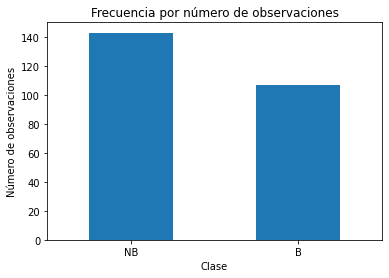

In [18]:
import matplotlib.pyplot as plt

cuenta_de_clase = pd.value_counts(df['Clase'], sort = True)
cuenta_de_clase.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frecuencia por número de observaciones")
plt.xlabel("Clase")
plt.ylabel("Número de observaciones");

In [16]:
#Revisando el balanceo de las clases
print("El porcentaje de la clase NB es:",len(df[df['Clase']=="NB"])/len(df['Clase']))
print("El porcentaje de la clase B es:",len(df[df['Clase']=="B"])/len(df['Clase']))

El porcentaje de la clase NB es: 0.572
El porcentaje de la clase B es: 0.428


---

**¿Cómo enfrentamos el desbalanceo?** 

---
De acuerdo a la revisión pudimos determinar que el conjunto no se encuentra desbalanceado, si observamos la gráfica de barras veremos que no se puede afirmar un desbalanceo.

1.   Clase NB (No esta en Bancarrota): 57.2%
2.   Clase B (Bancarrota): 42.8%

---
**Implicaciones de un FP o un FN:** 

---
Un falso positivo (FP) en el modelo implica categorizar en bancarrota a alguien que no lo esta.
Un falso negativo (FN) en el modelo implica no categorizar a alguien en bancarrota cuando en realidad si esta en bancarrota, esto implicaría que podría obtener un crédito y podría no pagar, lo que conllevaría a una perdida en caso de que no pueda pagar.

---
**Tipo de métrica a utilizar de acuerdo a taxonomía del artículo:** 

---
Al ser un problema de clasificación usaremos las métricas:


*   **precisión**, con la finalidad de medir la calidad el modelo al momento de predecir.
*   **recall**, para identificar los clientes que estarían en bancarrota
*   **accuracy**, con el objetivo de medir el porcentaje de aciertos que el modelo ha identificado.